## UMAP visualization

### Import packages and setup enviornment

In [1]:
from umap import UMAP
import umap.plot
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
import sklearn.datasets as skn
import ast
import re

import pandas as pd
import numpy as np

### Read and clean data

In [2]:
df_final = pd.read_csv('df_final_full.csv', index_col = 0)
genre_10 = pd.read_csv('genre_10.csv', index_col = 0)

In [3]:
df_final['track_genre_val'].value_counts()

rock                  45693
indie                 27514
pop                   20030
electronic            18906
Hip-Hop               11126
                      ...  
lets fetz                 1
linedance 2008            1
Rock - Progressive        1
post-zeppelin             1
tuplat                    1
Name: track_genre_val, Length: 6872, dtype: int64

In [4]:
def remove_changeline(factor):
    return factor.replace('\n','')

def remove_space(factor):
    s = factor
    return re.sub("\s\s+" , " ", s)

def add_comma(factor):
    return factor.replace(' ', ',')

In [5]:
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: remove_changeline(x))
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: remove_space(x))
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: add_comma(x))
df_final['item_factor'] = df_final['item_factor'].apply(lambda x: ast.literal_eval(x))

In [6]:
item_factors = pd.DataFrame(np.array(list(df_final['item_factor'])).T.tolist())

In [7]:
for i in range(item_factors.shape[0]):
    df_final['feature_'+str(i)] = np.array(item_factors.loc[i,:])

In [8]:
df_final

track_genre_val    year  \
0       Technical Death Metal  2009.0   
239                      rock  2000.0   
240                      rock  2000.0   
241                      rock  2000.0   
242                      rock  2000.0   
...                       ...     ...   
599721                    NaN  2008.0   
599722                    NaN  2004.0   
599724                    NaN  2008.0   
599725                    NaN  2007.0   
599726                    NaN  2008.0   

                                              item_factor  feature_0  \
0       [0.00169986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...    0.00170   
239     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
240     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
241     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
242     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
...                                                   ...        ...   
599721  [0.0, 0.0, 0.0, 0.0, 0.02220622, 0.0, 0.0, 0.0...    0.00000   
599722  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
599724  [0.0, 0.0, 0.0, 0.0, 0.00083194661, 0.0, 0.0, ...    0.00000   
599725  [0.00183016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...    0.00183   
599726  [0.0, 0.0, 0.0, 0.00762979, 0.0, 0.0, 0.0, 0.0...    0.00000   

        feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  ...  \
0             0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
239           0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
240           0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
241           0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
242           0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
...           ...        ...        ...        ...        ...        ...  ...   
599721        0.0        0.0    0.00000   0.022206        0.0        0.0  ...   
599722        0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
599724        0.0        0.0    0.00000   0.000832        0.0        0.0  ...   
599725        0.0        0.0    0.00000   0.000000        0.0        0.0  ...   
599726        0.0        0.0    0.00763   0.000000        0.0        0.0  ...   

        feature_140  feature_141  feature_142  feature_143  feature_144  \
0               0.0     0.002292          0.0     0.000000          0.0   
239             0.0     0.000000          0.0     0.000000          0.0   
240             0.0     0.000000          0.0     0.000000          0.0   
241             0.0     0.000000          0.0     0.000000          0.0   
242             0.0     0.000000          0.0     0.000000          0.0   
...             ...          ...          ...          ...          ...   
599721          0.0     0.000000          0.0     0.000411          0.0   
599722          0.0     0.000000          0.0     0.000000          0.0   
599724          0.0     0.000919          0.0     0.000000          0.0   
599725          0.0     0.000000          0.0     0.000000          0.0   
599726          0.0     0.000000          0.0     0.000000          0.0   

        feature_145  feature_146  feature_147  feature_148  feature_149  
0          0.000000     0.000000     0.000000      0.00000          0.0  
239        0.000000     0.000000     0.414304      0.00000          0.0  
240        0.000000     0.000000     0.414304      0.00000          0.0  
241        0.000000     0.000000     0.414304      0.00000          0.0  
242        0.000000     0.000000     0.414304      0.00000          0.0  
...             ...          ...          ...          ...          ...  
599721     0.000000     0.028676     0.000000      0.00000          0.0  
599722     0.005546     0.000000     0.000000      0.00135          0.0  
599724     0.000000     0.000000     0.000000      0.00000          0.0  
599725     0.000000     0.000000     0.000

### Read top 13 genre tags for further data cleaning

In our visualization, we would like to use track genre as our target label, but the genre space is very sparse, with 5769 unique track genres. Plotting a map of 5k labels would obsucre our analysis, especially when some track genre appeared only once. Hence, we decided to only label the top 13 track genres and label all other track genre as "other" and "None" genre as "NA", resulting in 15 labels for visualization at the end.

In [9]:
genre_10 = list(genre_10['genre'])

In [10]:
def get_genre(genre):
    if genre in genre_10:
        return genre
    if genre != genre:
        return 'NA'
    return 'other'

In [11]:
df_final['track_genre'] = df_final['track_genre_val'].apply(lambda x: get_genre(x))

In [12]:
df_final = df_final.drop('track_genre_val', axis = 1)

In [13]:
df_final['track_genre'].value_counts()

other               297541
NA                   72713
rock                 45693
indie                27514
pop                  20030
alternative           9767
alternative rock      4828
Love                   954
Mellow                 653
beautiful              550
favorites              533
00s                    530
Awesome                310
male vocalists         274
american               259
Name: track_genre, dtype: int64

The above list counts the occurrence of each of the 15 track genre labels. Note that due to the sparse genre space, NA and other genre takes up the largest proportions of the space.

In [14]:
# for umap learning, we would like to integer encode the categorical variables: artist term and track genre
# df_final['artist_term'] = df_final['artist_term'].astype('category')
# df_final['artist_term'] = df_final['artist_term'].cat.codes

df_final['year'] = df_final['year'].astype('category')

In [15]:
df_final

year                                        item_factor  feature_0  \
0       2009.0  [0.00169986, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...    0.00170   
239     2000.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
240     2000.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
241     2000.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
242     2000.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
...        ...                                                ...        ...   
599721  2008.0  [0.0, 0.0, 0.0, 0.0, 0.02220622, 0.0, 0.0, 0.0...    0.00000   
599722  2004.0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...    0.00000   
599724  2008.0  [0.0, 0.0, 0.0, 0.0, 0.00083194661, 0.0, 0.0, ...    0.00000   
599725  2007.0  [0.00183016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...    0.00183   
599726  2008.0  [0.0, 0.0, 0.0, 0.00762979, 0.0, 0.0, 0.0, 0.0...    0.00000   

        feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0             0.0        0.0    0.00000   0.000000        0.0        0.0   
239           0.0        0.0    0.00000   0.000000        0.0        0.0   
240           0.0        0.0    0.00000   0.000000        0.0        0.0   
241           0.0        0.0    0.00000   0.000000        0.0        0.0   
242           0.0        0.0    0.00000   0.000000        0.0        0.0   
...           ...        ...        ...        ...        ...        ...   
599721        0.0        0.0    0.00000   0.022206        0.0        0.0   
599722        0.0        0.0    0.00000   0.000000        0.0        0.0   
599724        0.0        0.0    0.00000   0.000832        0.0        0.0   
599725        0.0        0.0    0.00000   0.000000        0.0        0.0   
599726        0.0        0.0    0.00763   0.000000        0.0        0.0   

        feature_7  ...  feature_141  feature_142  feature_143  feature_144  \
0        0.000000  ...     0.002292          0.0     0.000000          0.0   
239      0.000000  ...     0.000000          0.0     0.000000          0.0   
240      0.000000  ...     0.000000          0.0     0.000000          0.0   
241      0.000000  ...     0.000000          0.0     0.000000          0.0   
242      0.000000  ...     0.000000          0.0     0.000000          0.0   
...           ...  ...          ...          ...          ...          ...   
599721   0.000736  ...     0.000000          0.0     0.000411          0.0   
599722   0.000000  ...     0.000000          0.0     0.000000          0.0   
599724   0.000000  ...     0.000919          0.0     0.000000          0.0   
599725   0.000000  ...     0.000000          0.0     0.000000          0.0   
599726   0.000000  ...     0.000000          0.0     0.000000          0.0   

        feature_145  feature_146  feature_147  feature_148  feature_149  \
0          0.000000     0.000000     0.000000      0.00000          0.0   
239        0.000000     0.000000     0.414304      0.00000          0.0   
240        0.000000     0.000000     0.414304      0.00000          0.0   
241        0.000000     0.000000     0.414304      0.00000          0.0   
242        0.000000     0.000000     0.414304      0.00000          0.0   
...             ...          ...          ...          ...          ...   
599721     0.000000     0.028676     0.000000      0.00000          0.0   
599722     0.005546     0.000000     0.000000      0.00135          0.0   
599724     0.000000     0.000000     0.000000      0.00000          0.0   
599725     0.000000     0.000000     0.000000      0.00000          0.0   
599726     0.000000     0.023314     0.000000      0.00000          0.0   

        track_genre  
0             other  
239            rock  
240            rock  
241            rock  
242            rock  
...             ...  
599721           NA  
599722           NA  
599724           NA  
599725           NA  
599726           NA  

[482149 rows x 153 columns]

Out of concern that the sheer size of the other and the NA genres would obscure the visualization, we also prepared a dataset that excludes other and NA genre for a back-up visualization.

In [16]:
df_plot = df_final[df_final['track_genre'] != 'other']

In [17]:
df_plot = df_plot[df_plot['track_genre'] != 'NA']

### Data preparation for UMAP parameter tunings

In [18]:
np.random.seed = 42
df_final_sample = df_final.sample(20000, random_state = 42)

In [19]:
labels_withNAother = df_final_sample['track_genre']
data_withNAother = df_final_sample.iloc[:,2:152].values

In [20]:
labels_withoutNAother = df_plot['track_genre']
data_withoutNAother = df_plot.iloc[:,2:152].values

In [21]:
from sklearn.preprocessing import StandardScaler
scaled_data_withNAother = StandardScaler().fit_transform(data_withNAother)
scaled_data_withoutNAother = StandardScaler().fit_transform(data_withoutNAother)

### Parameter tuning for UMAP on datasets with/ without NA and other genre

Before anything, below is a blind first trial plot.

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.001, n_neighbors=200,
     random_state=42, spread=2, verbose=True)
Construct fuzzy simplicial set
Mon May 17 18:54:08 2021 Finding Nearest Neighbors
Mon May 17 18:54:08 2021 Building RP forest with 12 trees
Mon May 17 18:54:09 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon May 17 18:58:32 2021 Finished Nearest Neighbor Search
Mon May 17 18:58:35 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 18:59:07 2021 Finished embedding


<AxesSubplot:>

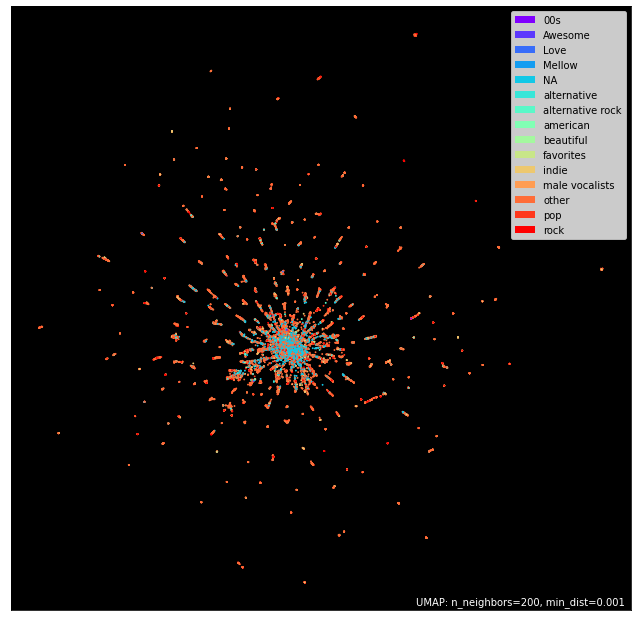

In [29]:
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 2, n_neighbors = 200,
             min_dist = 0.001).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon May 17 19:00:58 2021 Finding Nearest Neighbors
Mon May 17 19:00:58 2021 Building RP forest with 12 trees
Mon May 17 19:00:58 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 19:01:04 2021 Finished Nearest Neighbor Search
Mon May 17 19:01:04 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 19:01:22 2021 Finished embedding


<AxesSubplot:>

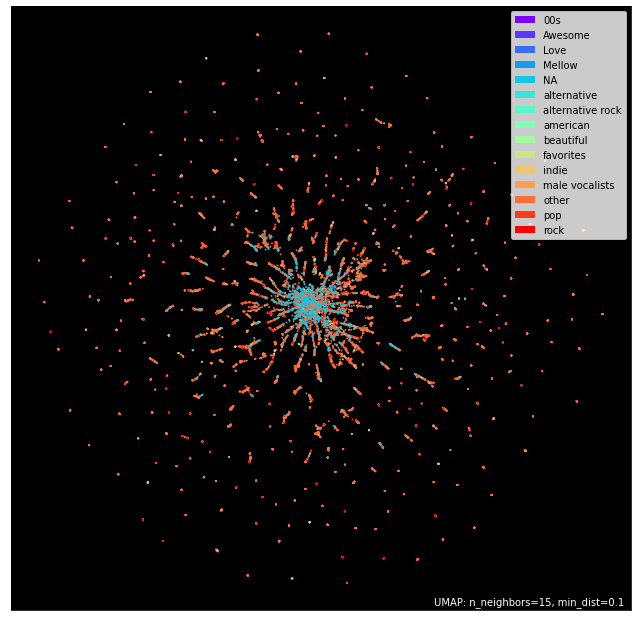

In [30]:
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True).fit(data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
# plt.savefig('10_0.01_100_percent_400k_66.eps')

Based on the trial above, I re-designed a workflow of parameter tuning that will be followed in the rest of this notebook. The parameters to be tuned are assumed to be the interest of concern (because they should influence the shape of the plot the most) in this visualization project.

#### Summary: work flow of this section
1. parameter tuning using 70k+ data (with other and NA genre, full dataset): 

    #### tuned on spread, n_neighbor, min_dist, n_epoch

    i. logic resembles that of the basic recommendation: control the rest and change one to get a range of best looking parameters
    
    ii. grid search on 3*3 grid of parameters and find the best looking set of parameters

2. parameter tuning using random sampled 20k data (without other and NA) for fast tuning

    #### tuned on spread, n_neighbor, min_dist, n_epoch
    
    the same workflow as in bullet 1, for dataset with other and NA genre
    
    
3. plot full dataset with NA and other (200k) & without NA and other (70k)

In [23]:
# Parameters for fine tuning
spread = [0.1, 0.5, 0.75, 1, 1.5, 2, 3, 5, 10, 50] # default = 1
n_neighbors = [20, 50, 100, 200, 300, 400, 500, 1000, 1500, 2000] # default = 15
min_dist = [0.00000001, 0.0000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1] # default = 0.1
n_epoch = [] # default = None; 200 for large dataset, 500 for small

1. Dataset with NA and other genre

1.1 Tuning on n_neighbors, other parameters held defaul

In [32]:
time_nn = []

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=20, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 19:02:14 2021 Finding Nearest Neighbors
Mon May 17 19:02:14 2021 Building RP forest with 12 trees
Mon May 17 19:02:14 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 19:02:23 2021 Finished Nearest Neighbor Search
Mon May 17 19:02:23 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 19:02:45 2021 Finished embedding
0:00:31.119760


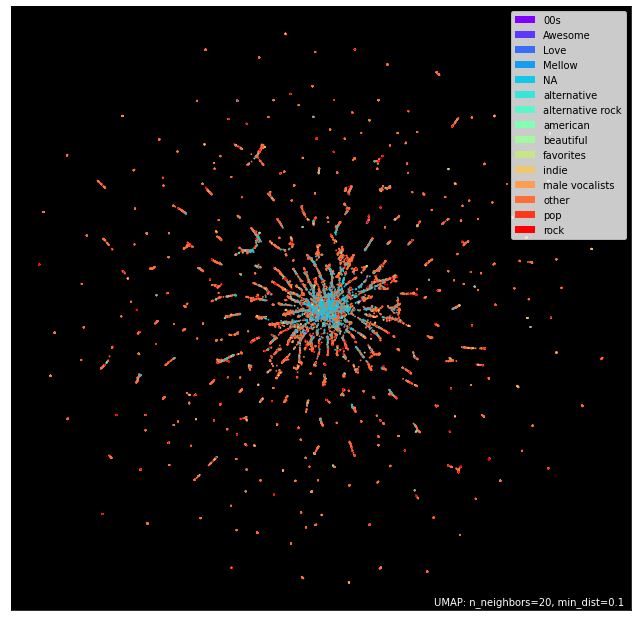

In [33]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[0]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('nn0.jpg')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=50, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 19:12:22 2021 Finding Nearest Neighbors
Mon May 17 19:12:22 2021 Building RP forest with 12 trees
Mon May 17 19:12:22 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 19:13:00 2021 Finished Nearest Neighbor Search
Mon May 17 19:13:00 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 19:13:21 2021 Finished embedding
0:00:59.472127


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

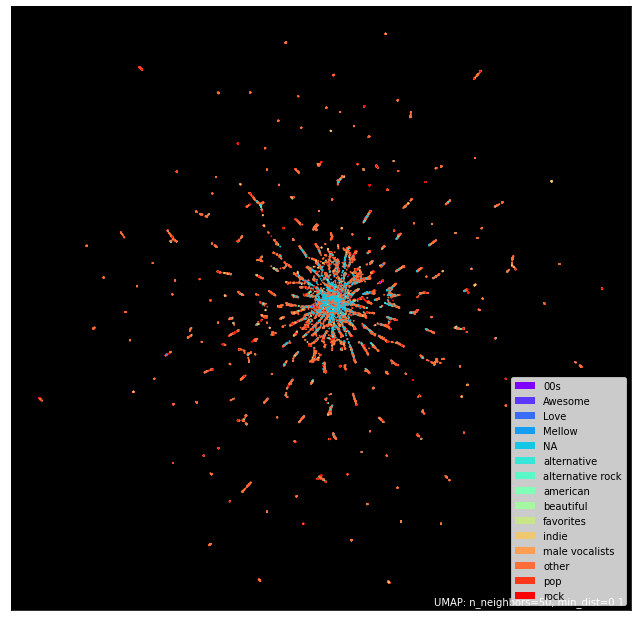

In [38]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[1]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('plt_nn1.jpg')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=100, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 19:42:23 2021 Finding Nearest Neighbors
Mon May 17 19:42:23 2021 Building RP forest with 12 trees
Mon May 17 19:42:23 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 19:44:13 2021 Finished Nearest Neighbor Search
Mon May 17 19:44:14 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 19:44:42 2021 Finished embedding
0:02:19.457949


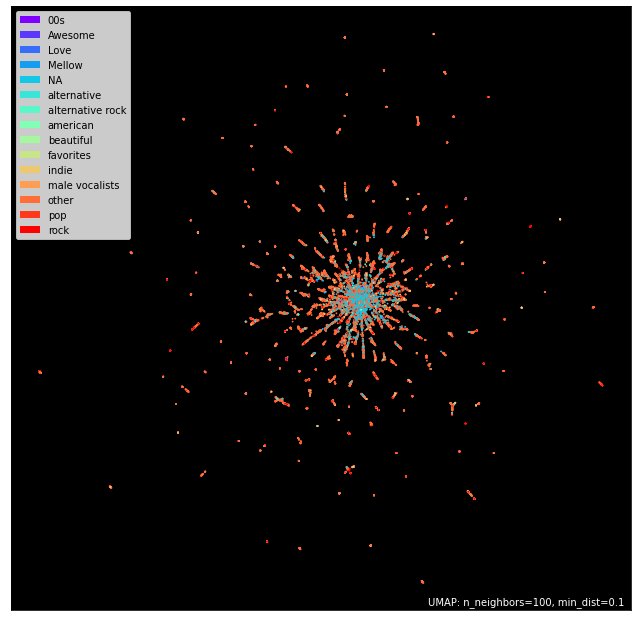

In [45]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[2]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=200, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 19:45:01 2021 Finding Nearest Neighbors
Mon May 17 19:45:01 2021 Building RP forest with 12 trees
Mon May 17 19:45:02 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon May 17 19:49:09 2021 Finished Nearest Neighbor Search
Mon May 17 19:49:10 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 19:49:42 2021 Finished embedding
0:04:41.198178


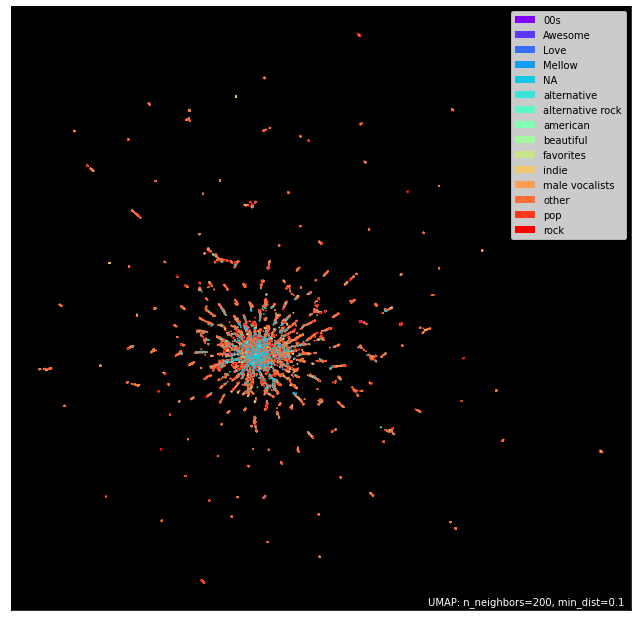

In [46]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[3]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=300, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 19:50:57 2021 Finding Nearest Neighbors
Mon May 17 19:50:57 2021 Building RP forest with 12 trees
Mon May 17 19:50:57 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon May 17 19:55:50 2021 Finished Nearest Neighbor Search
Mon May 17 19:55:52 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 19:56:27 2021 Finished embedding
0:05:30.102151


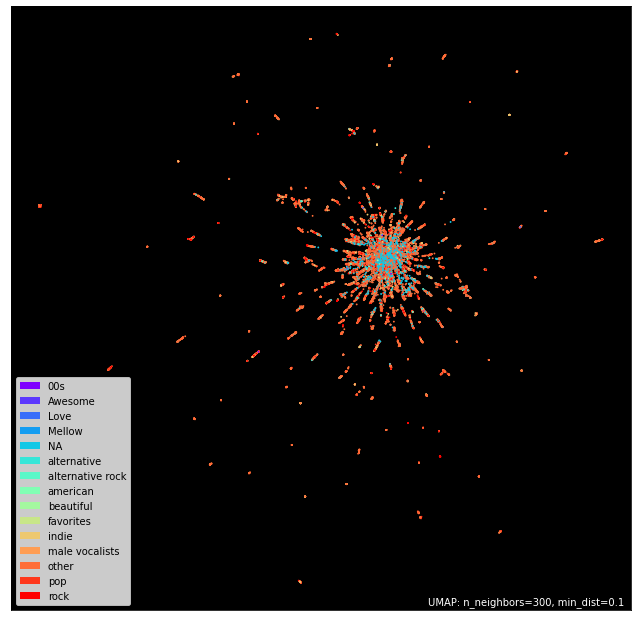

In [47]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[4]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=400, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 20:00:24 2021 Finding Nearest Neighbors
Mon May 17 20:00:24 2021 Building RP forest with 12 trees
Mon May 17 20:00:24 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	Stopping threshold met -- exiting after 7 iterations
Mon May 17 20:06:39 2021 Finished Nearest Neighbor Search
Mon May 17 20:06:41 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 20:07:18 2021 Finished embedding
0:06:54.169577


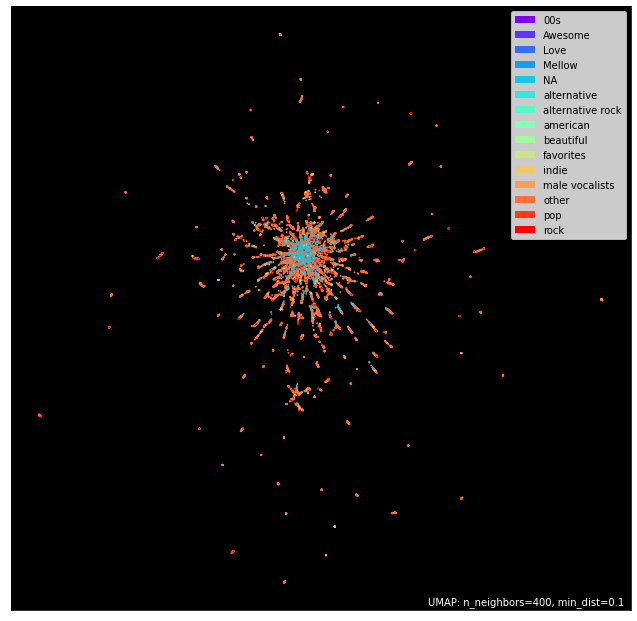

In [48]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[5]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=500, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 20:30:45 2021 Finding Nearest Neighbors
Mon May 17 20:30:45 2021 Building RP forest with 12 trees
Mon May 17 20:30:46 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	Stopping threshold met -- exiting after 8 iterations
Mon May 17 20:38:39 2021 Finished Nearest Neighbor Search
Mon May 17 20:38:41 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 20:39:21 2021 Finished embedding
0:08:36.096457


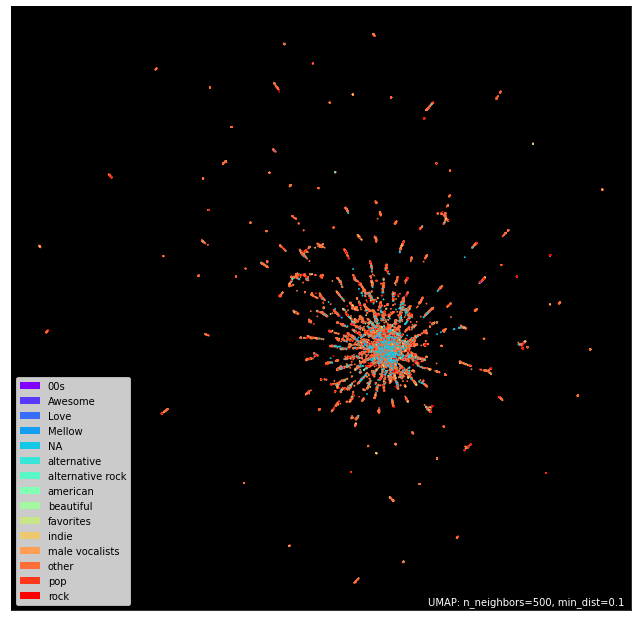

In [49]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[6]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=1000, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 20:40:40 2021 Finding Nearest Neighbors
Mon May 17 20:40:40 2021 Building RP forest with 12 trees
Mon May 17 20:40:41 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	 9  /  14
	Stopping threshold met -- exiting after 9 iterations
Mon May 17 20:57:00 2021 Finished Nearest Neighbor Search
Mon May 17 20:57:05 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 20:57:48 2021 Finished embedding
0:17:07.799982


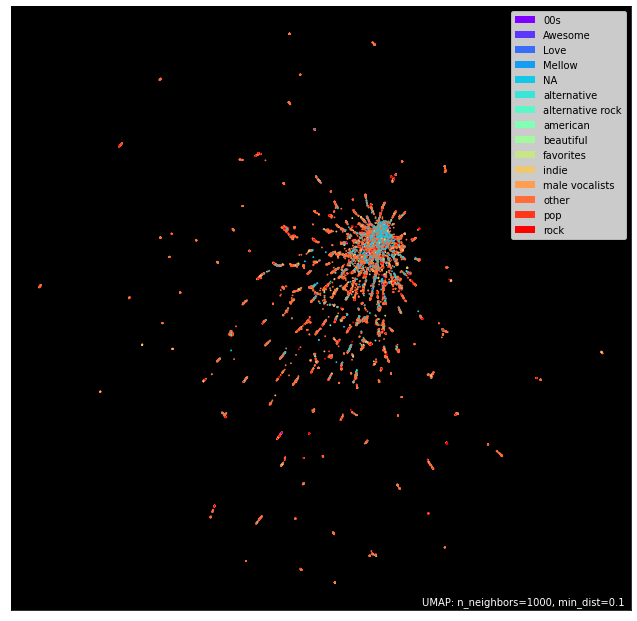

In [50]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[7]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=1500, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 21:10:21 2021 Finding Nearest Neighbors
Mon May 17 21:10:21 2021 Building RP forest with 12 trees
Mon May 17 21:10:22 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	 9  /  14
	 10  /  14
	Stopping threshold met -- exiting after 10 iterations
Mon May 17 21:37:41 2021 Finished Nearest Neighbor Search
Mon May 17 21:37:56 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 21:38:39 2021 Finished embedding


NameError: name 'time_nn' is not defined

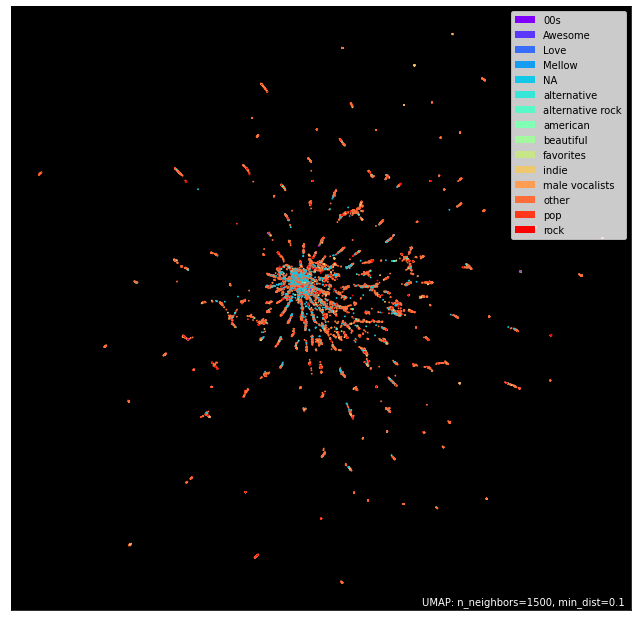

In [24]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[8]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=2000, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 21:39:23 2021 Finding Nearest Neighbors
Mon May 17 21:39:23 2021 Building RP forest with 12 trees
Mon May 17 21:39:24 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	 8  /  14
	 9  /  14
	 10  /  14
	 11  /  14
	Stopping threshold met -- exiting after 11 iterations
Mon May 17 22:18:32 2021 Finished Nearest Neighbor Search
Mon May 17 22:18:42 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:19:23 2021 Finished embedding


NameError: name 'time_nn' is not defined

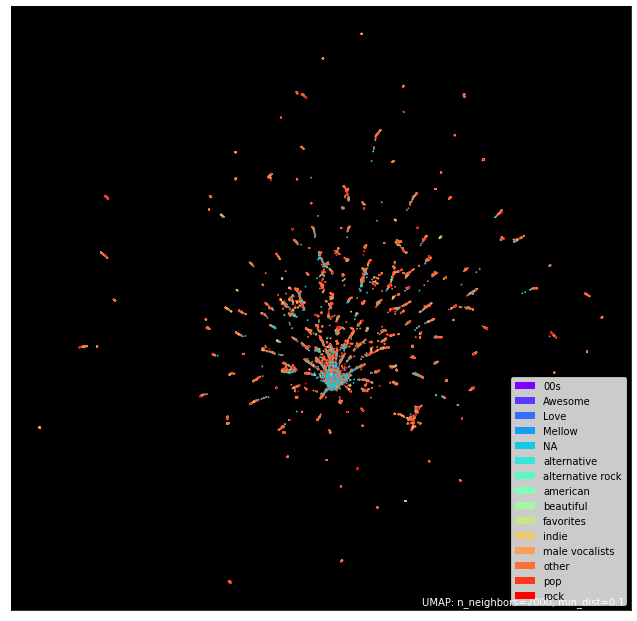

In [25]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             n_neighbors = n_neighbors[9]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_nn.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Parameter value of n_neighbors')

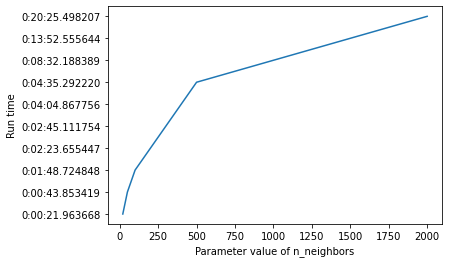

In [45]:
plt.plot(n_neighbors, time_nn)
plt.ylabel('Run time')
plt.xlabel('Parameter value of n_neighbors')

1.2 Tuning on spread, other parameters held default

In [26]:
time_s = []

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=0.1, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:33:12 2021 Finding Nearest Neighbors
Mon May 17 22:33:12 2021 Building RP forest with 12 trees
Mon May 17 22:33:12 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:33:17 2021 Finished Nearest Neighbor Search
Mon May 17 22:33:18 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:33:33 2021 Finished embedding
0:00:21.684268


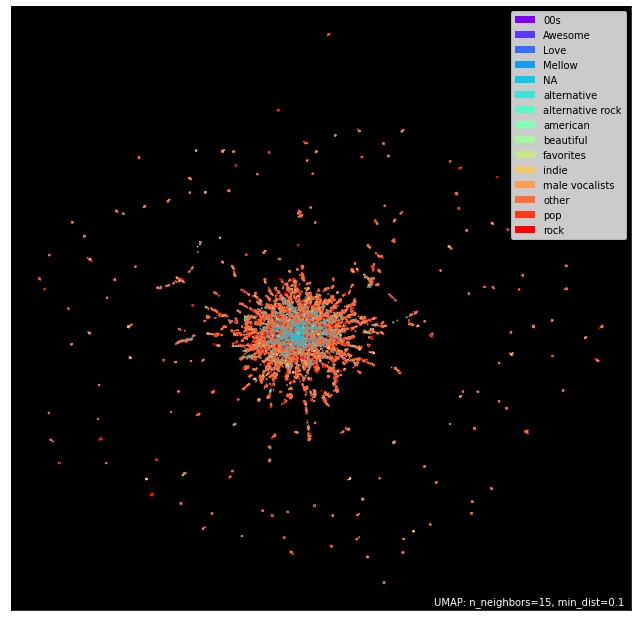

In [27]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[0]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=0.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:33:57 2021 Finding Nearest Neighbors
Mon May 17 22:33:57 2021 Building RP forest with 12 trees
Mon May 17 22:33:57 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:34:02 2021 Finished Nearest Neighbor Search
Mon May 17 22:34:03 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:34:19 2021 Finished embedding
0:00:22.277059


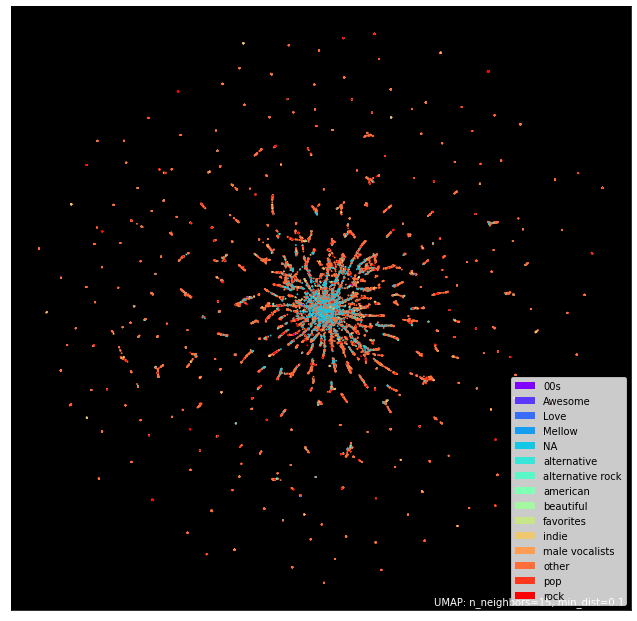

In [28]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[1]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=0.75, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:34:44 2021 Finding Nearest Neighbors
Mon May 17 22:34:44 2021 Building RP forest with 12 trees
Mon May 17 22:34:44 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:34:49 2021 Finished Nearest Neighbor Search
Mon May 17 22:34:50 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:35:05 2021 Finished embedding
0:00:21.449011


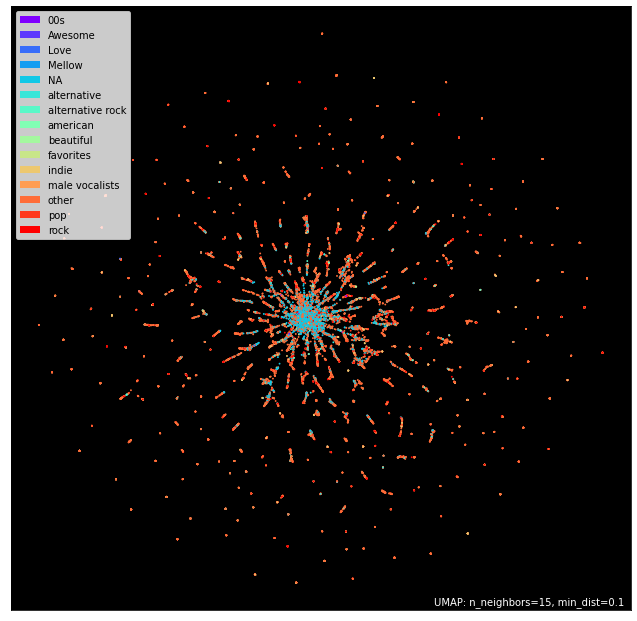

In [29]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[2]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=1, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:35:06 2021 Finding Nearest Neighbors
Mon May 17 22:35:06 2021 Building RP forest with 12 trees
Mon May 17 22:35:07 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:35:12 2021 Finished Nearest Neighbor Search
Mon May 17 22:35:12 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:35:29 2021 Finished embedding
0:00:23.304155


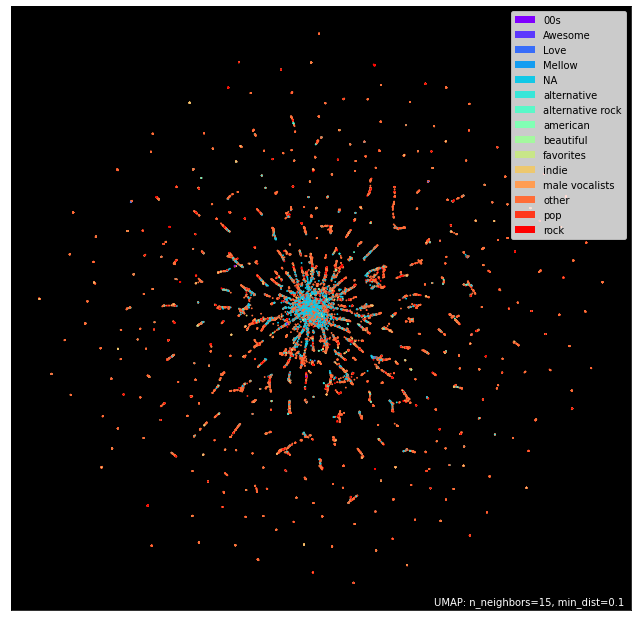

In [30]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[3]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=1.5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:35:30 2021 Finding Nearest Neighbors
Mon May 17 22:35:30 2021 Building RP forest with 12 trees
Mon May 17 22:35:31 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:35:36 2021 Finished Nearest Neighbor Search
Mon May 17 22:35:36 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:35:52 2021 Finished embedding
0:00:21.409368


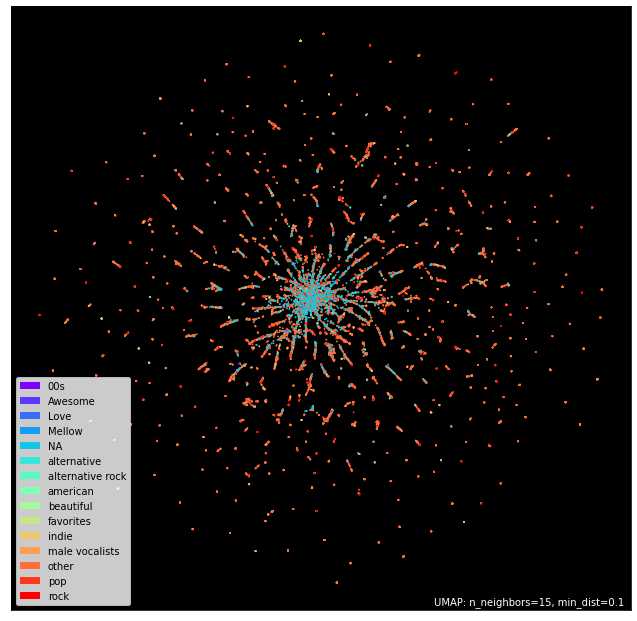

In [31]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[4]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=2, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:35:53 2021 Finding Nearest Neighbors
Mon May 17 22:35:53 2021 Building RP forest with 12 trees
Mon May 17 22:35:53 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:35:58 2021 Finished Nearest Neighbor Search
Mon May 17 22:35:58 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:36:14 2021 Finished embedding
0:00:21.614751


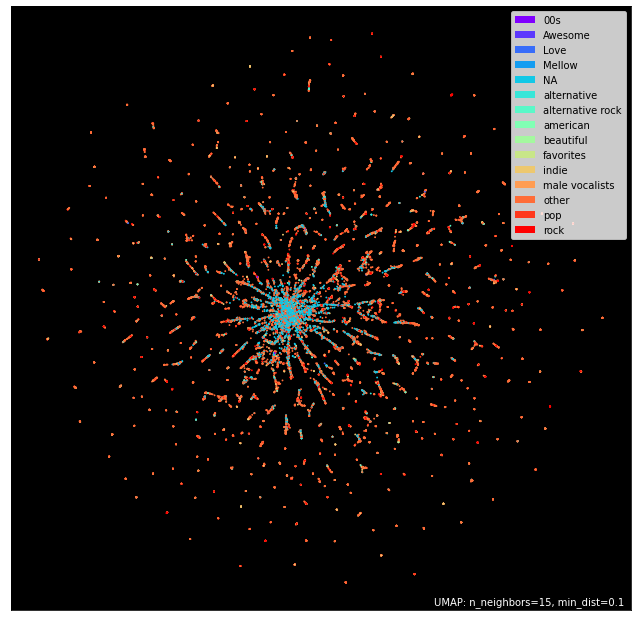

In [32]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[5]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=3, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:36:15 2021 Finding Nearest Neighbors
Mon May 17 22:36:15 2021 Building RP forest with 12 trees
Mon May 17 22:36:16 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:36:21 2021 Finished Nearest Neighbor Search
Mon May 17 22:36:21 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:36:37 2021 Finished embedding
0:00:21.618722


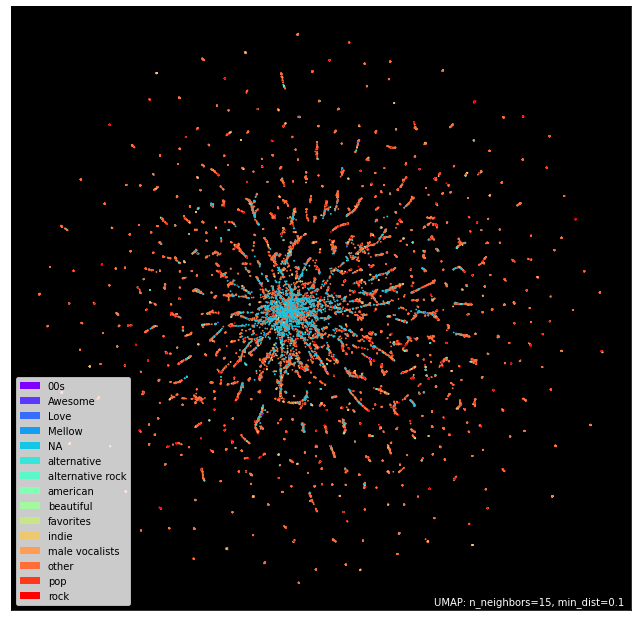

In [33]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[6]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=5, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:36:38 2021 Finding Nearest Neighbors
Mon May 17 22:36:38 2021 Building RP forest with 12 trees
Mon May 17 22:36:38 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:36:43 2021 Finished Nearest Neighbor Search
Mon May 17 22:36:43 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:36:59 2021 Finished embedding
0:00:21.525267


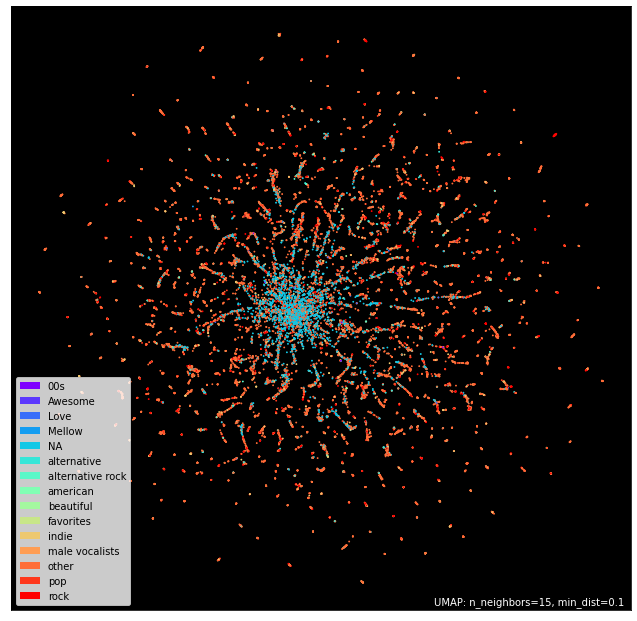

In [34]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[7]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=10, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:37:00 2021 Finding Nearest Neighbors
Mon May 17 22:37:00 2021 Building RP forest with 12 trees
Mon May 17 22:37:01 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:37:06 2021 Finished Nearest Neighbor Search
Mon May 17 22:37:06 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:37:24 2021 Finished embedding
0:00:23.840468


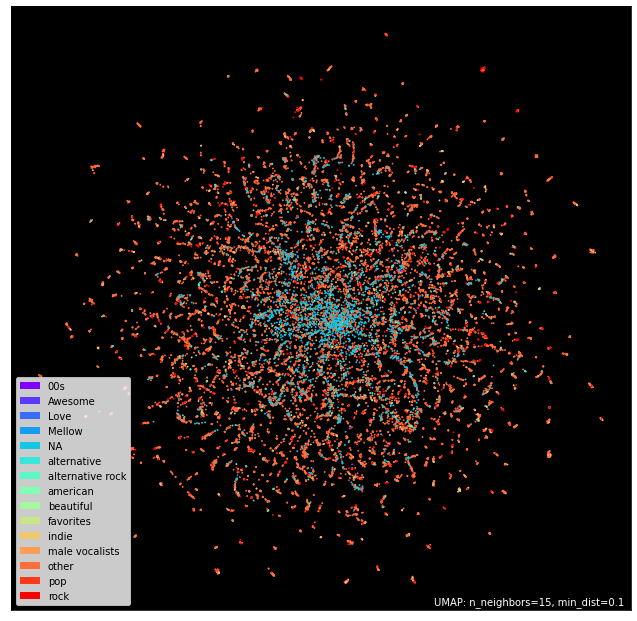

In [35]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[8]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

/home/yw5280/.local/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, spread=50, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:37:25 2021 Finding Nearest Neighbors
Mon May 17 22:37:25 2021 Building RP forest with 12 trees
Mon May 17 22:37:26 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:37:31 2021 Finished Nearest Neighbor Search
Mon May 17 22:37:31 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:37:46 2021 Finished embedding
0:00:21.460985


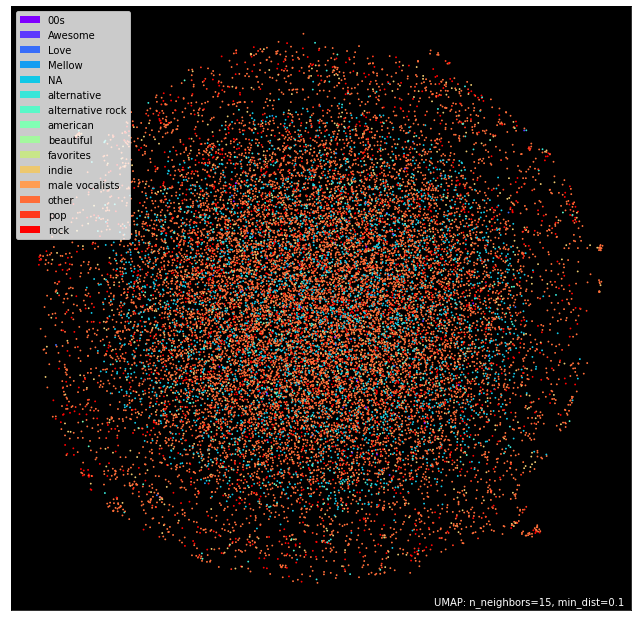

In [36]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             spread = spread[9]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_s.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

Text(0.5, 0, 'Parameter value of spread')

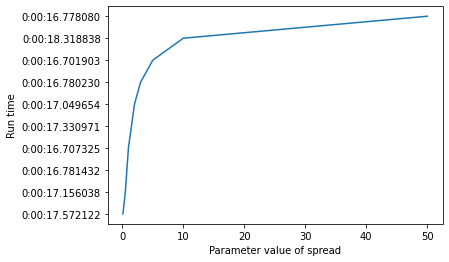

In [58]:
plt.plot(spread, time_s)
plt.ylabel('Run time')
plt.xlabel('Parameter value of spread')

1.3 Tuning on min_dist, other parameters held default

In [37]:
time_md = []

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1e-08, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:38:23 2021 Finding Nearest Neighbors
Mon May 17 22:38:23 2021 Building RP forest with 12 trees
Mon May 17 22:38:24 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:38:29 2021 Finished Nearest Neighbor Search
Mon May 17 22:38:29 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:38:45 2021 Finished embedding
0:00:21.449516


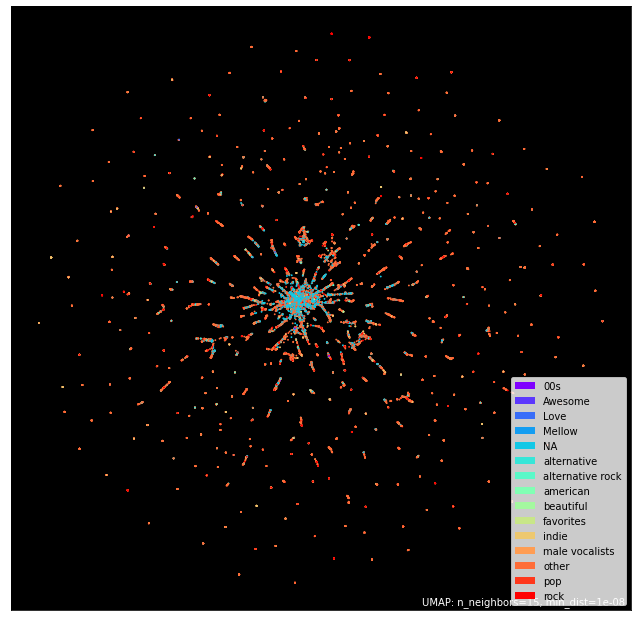

In [38]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[0]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1e-07, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:38:46 2021 Finding Nearest Neighbors
Mon May 17 22:38:46 2021 Building RP forest with 12 trees
Mon May 17 22:38:46 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:38:51 2021 Finished Nearest Neighbor Search
Mon May 17 22:38:52 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:39:07 2021 Finished embedding
0:00:21.634165


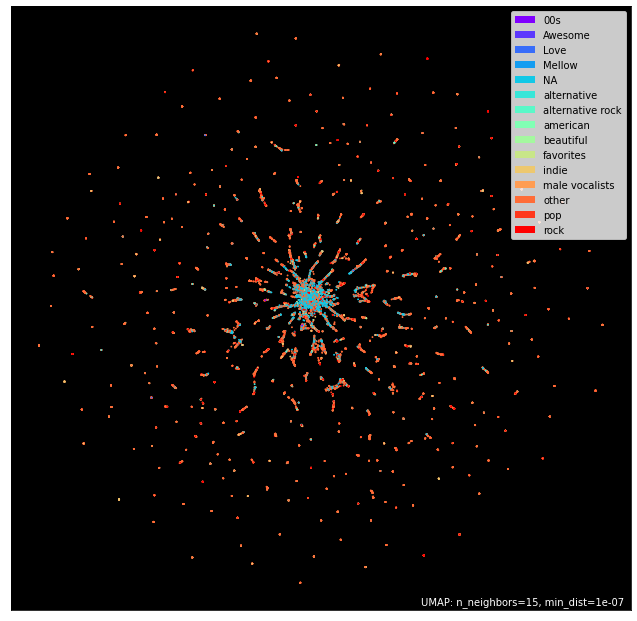

In [39]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[1]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1e-05, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:39:08 2021 Finding Nearest Neighbors
Mon May 17 22:39:08 2021 Building RP forest with 12 trees
Mon May 17 22:39:09 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:39:14 2021 Finished Nearest Neighbor Search
Mon May 17 22:39:14 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:39:30 2021 Finished embedding
0:00:21.545369


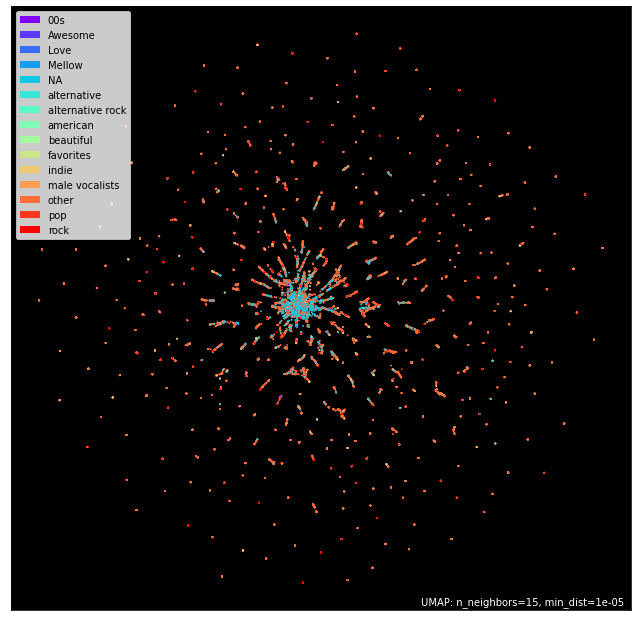

In [40]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[2]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0001, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:39:31 2021 Finding Nearest Neighbors
Mon May 17 22:39:31 2021 Building RP forest with 12 trees
Mon May 17 22:39:31 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:39:36 2021 Finished Nearest Neighbor Search
Mon May 17 22:39:37 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:39:52 2021 Finished embedding
0:00:21.573597


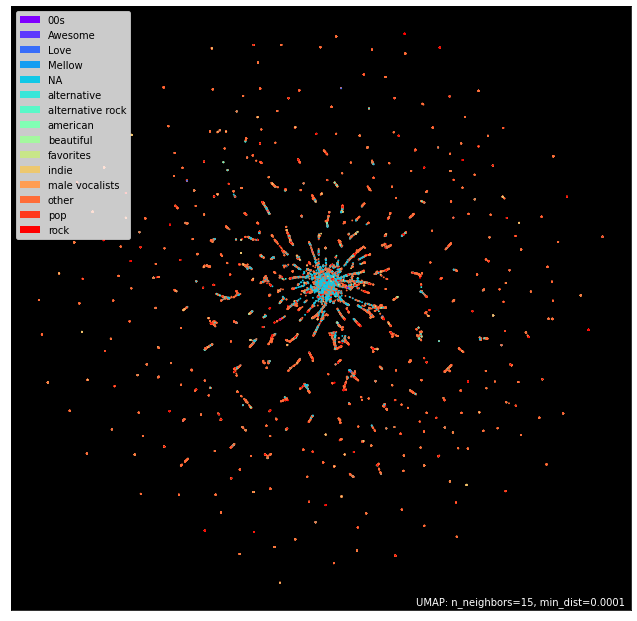

In [41]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[3]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.001, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:39:53 2021 Finding Nearest Neighbors
Mon May 17 22:39:53 2021 Building RP forest with 12 trees
Mon May 17 22:39:54 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:39:59 2021 Finished Nearest Neighbor Search
Mon May 17 22:39:59 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:40:16 2021 Finished embedding
0:00:23.287426


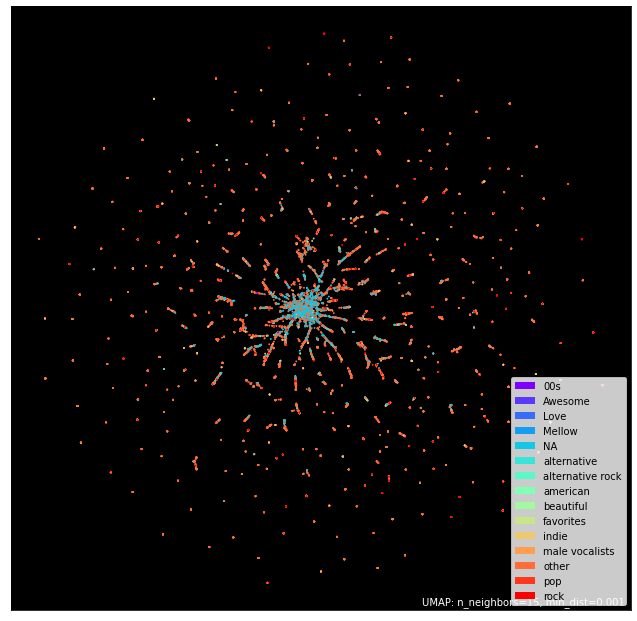

In [42]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[4]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.01, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:40:18 2021 Finding Nearest Neighbors
Mon May 17 22:40:18 2021 Building RP forest with 12 trees
Mon May 17 22:40:18 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:40:23 2021 Finished Nearest Neighbor Search
Mon May 17 22:40:23 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:40:39 2021 Finished embedding
0:00:21.637568


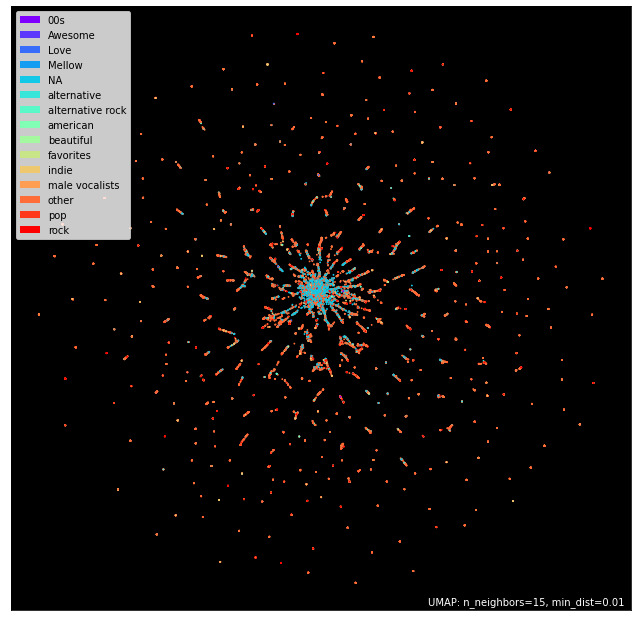

In [43]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[5]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.05, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:40:40 2021 Finding Nearest Neighbors
Mon May 17 22:40:40 2021 Building RP forest with 12 trees
Mon May 17 22:40:41 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:40:46 2021 Finished Nearest Neighbor Search
Mon May 17 22:40:46 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:41:01 2021 Finished embedding
0:00:21.456175


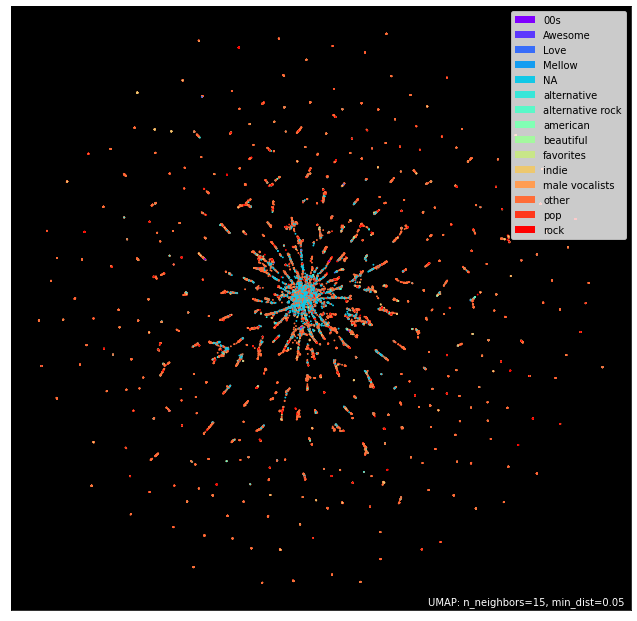

In [44]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[6]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:41:02 2021 Finding Nearest Neighbors
Mon May 17 22:41:02 2021 Building RP forest with 12 trees
Mon May 17 22:41:03 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:41:08 2021 Finished Nearest Neighbor Search
Mon May 17 22:41:08 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:41:24 2021 Finished embedding
0:00:21.987572


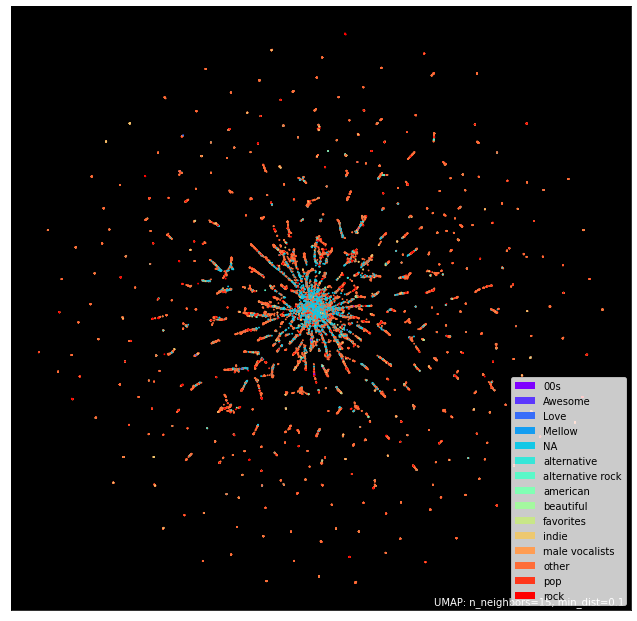

In [45]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[7]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.5, random_state=42,
     verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:41:25 2021 Finding Nearest Neighbors
Mon May 17 22:41:25 2021 Building RP forest with 12 trees
Mon May 17 22:41:26 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:41:31 2021 Finished Nearest Neighbor Search
Mon May 17 22:41:31 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:41:47 2021 Finished embedding
0:00:21.952054


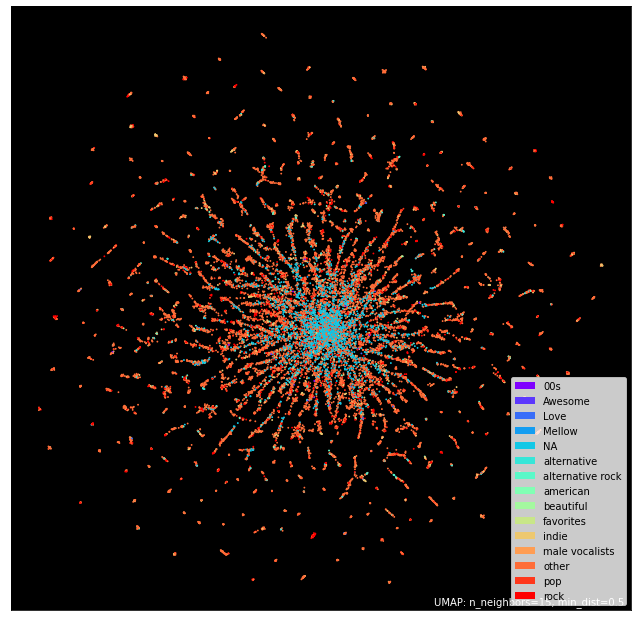

In [46]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[8]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=1, random_state=42, verbose=True)
Construct fuzzy simplicial set
Mon May 17 22:41:48 2021 Finding Nearest Neighbors
Mon May 17 22:41:48 2021 Building RP forest with 12 trees
Mon May 17 22:41:49 2021 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	Stopping threshold met -- exiting after 4 iterations
Mon May 17 22:41:54 2021 Finished Nearest Neighbor Search
Mon May 17 22:41:54 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon May 17 22:42:11 2021 Finished embedding
0:00:23.270448


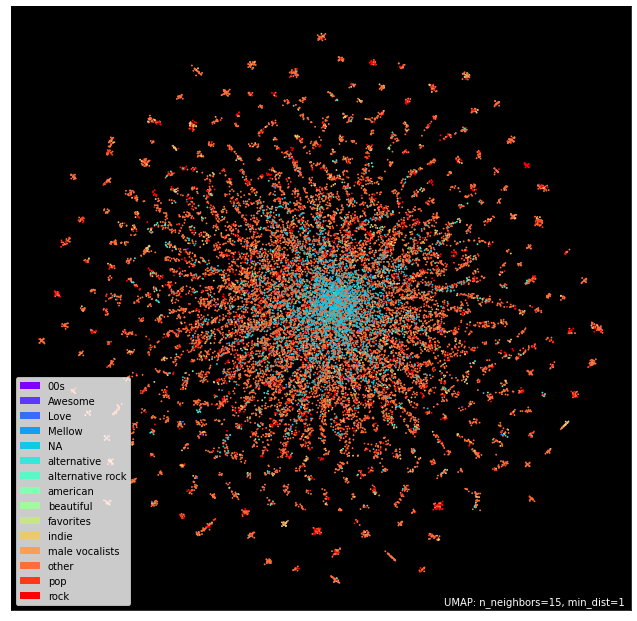

In [47]:
start_time = time.time()
mapper_withNAother = UMAP(random_state=42, n_components=2, verbose = True, 
             min_dist = min_dist[9]).fit(scaled_data_withNAother)

umap.plot.points(mapper_withNAother, labels = labels_withNAother, theme = 'fire')
end_time = time.time()
duration = str(datetime.timedelta(seconds = end_time - start_time))
time_md.append(duration)
print(duration)
# plt.savefig('10_0.01_100_percent_400k_66.eps')

Text(0.5, 0, 'Parameter value of min_dist')

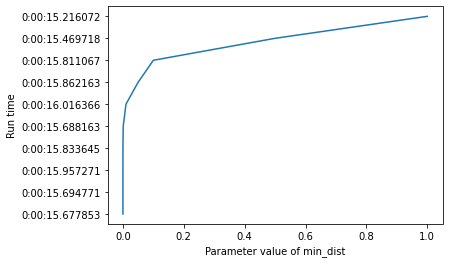

In [41]:
plt.plot(min_dist, time_md)
plt.ylabel('Run time')
plt.xlabel('Parameter value of min_dist')

### Final selected UMAP learning and plot with selected dataset and selected parameters

1. Plot on full dataset of df_final

In [16]:
features = df_final.iloc[:,2:152].values
labels = df_final['track_genre']

In [ ]:
# start_time = time.time()
# mapper = UMAP(random_state=42, n_components=2, verbose = True, 
#               spread = 0.75, n_neighbors = 200,
#              min_dist = 0.5).fit(features)
# end_time = time.time()
# str(datetime.timedelta(seconds = end_time - start_time))

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.5, n_neighbors=200,
     random_state=42, spread=0.75, verbose=True)
Construct fuzzy simplicial set
Tue May 18 00:21:59 2021 Finding Nearest Neighbors
Tue May 18 00:21:59 2021 Building RP forest with 40 trees
Tue May 18 00:23:08 2021 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	 3  /  19
	 4  /  19
	Stopping threshold met -- exiting after 4 iterations
Tue May 18 01:48:11 2021 Finished Nearest Neighbor Search
Tue May 18 01:48:33 2021 Construct embedding


In [21]:
start_time = time.time()
mapper = UMAP(random_state=42, n_components=2, verbose = True).fit(features)
end_time = time.time()
str(datetime.timedelta(seconds = end_time - start_time))

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Tue May 18 03:10:05 2021 Finding Nearest Neighbors
Tue May 18 03:10:05 2021 Building RP forest with 40 trees
Tue May 18 03:11:09 2021 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	 3  /  19
	Stopping threshold met -- exiting after 3 iterations
Tue May 18 03:12:54 2021 Finished Nearest Neighbor Search
Tue May 18 03:13:01 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral in

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue May 18 03:58:08 2021 Finished embedding


'0:48:03.630894'

<AxesSubplot:>

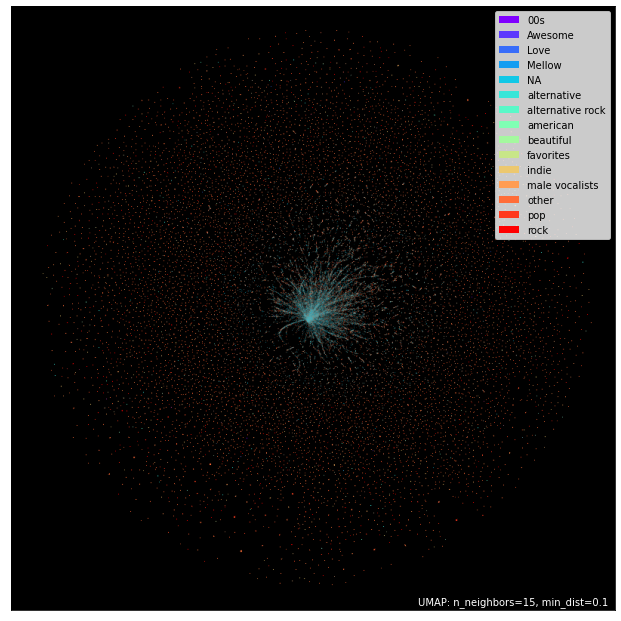

In [22]:
umap.plot.points(mapper, labels = labels, theme = 'fire')
# plt.savefig('400nn_0.75s_0.5md.eps')

The best ALS learned itemfactors matrix is too sparse and raises an error 'UserWarning: WARNING: spectral initialisation failed! The eigenvector solver failed. This is likely due to too small an eigengap. Consider adding some noise or jitter to your data.'

We will downsample the dataframe to 70000 data to generate a comparable graph against the UMAP for the item latent factors from default ALS model.

In [23]:
df_downsample = df_final.sample(70000, random_state=42)
features = df_downsample.iloc[:,2:152].values
labels = df_downsample['track_genre']

In [24]:
start_time = time.time()
mapper = UMAP(random_state=42, n_components=2, verbose = True).fit(features)
end_time = time.time()
str(datetime.timedelta(seconds = end_time - start_time))

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42, verbose=True)
Construct fuzzy simplicial set
Tue May 18 03:59:47 2021 Finding Nearest Neighbors
Tue May 18 03:59:47 2021 Building RP forest with 18 trees
Tue May 18 03:59:51 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Tue May 18 04:00:08 2021 Finished Nearest Neighbor Search
Tue May 18 04:00:09 2021 Construct embedding


/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/yw5280/.local/lib/python3.8/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue May 18 04:02:00 2021 Finished embedding


'0:02:15.005246'

<AxesSubplot:>

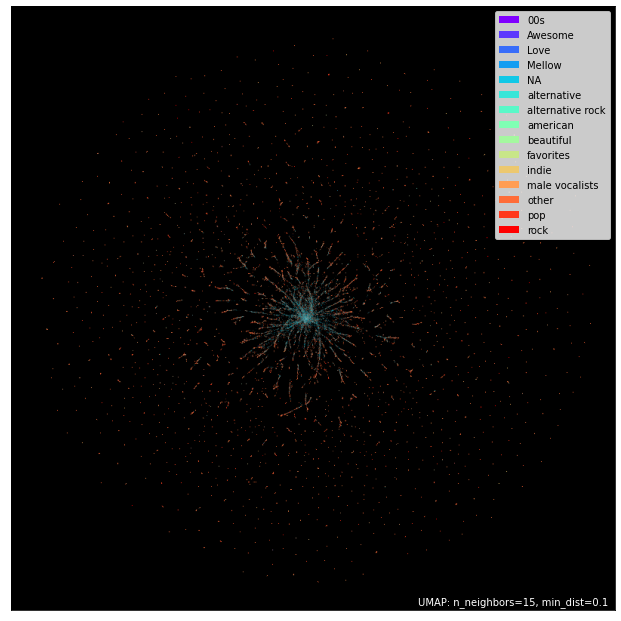

In [25]:
umap.plot.points(mapper, labels = labels, theme = 'fire')
# plt.savefig('400nn_0.75s_0.5md.eps')

In [26]:
start_time = time.time()
mapper = UMAP(random_state=42, n_components=2, verbose = True, 
              spread = 0.75, n_neighbors = 200,
             min_dist = 0.5).fit(features)
end_time = time.time()
str(datetime.timedelta(seconds = end_time - start_time))

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.5, n_neighbors=200,
     random_state=42, spread=0.75, verbose=True)
Construct fuzzy simplicial set
Tue May 18 04:03:14 2021 Finding Nearest Neighbors
Tue May 18 04:03:14 2021 Building RP forest with 18 trees
Tue May 18 04:03:18 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	 5  /  16
	Stopping threshold met -- exiting after 5 iterations
Tue May 18 04:19:55 2021 Finished Nearest Neighbor Search
Tue May 18 04:19:59 2021 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue May 18 04:25:23 2021 Finished embedding


'0:22:08.754565'

<AxesSubplot:>

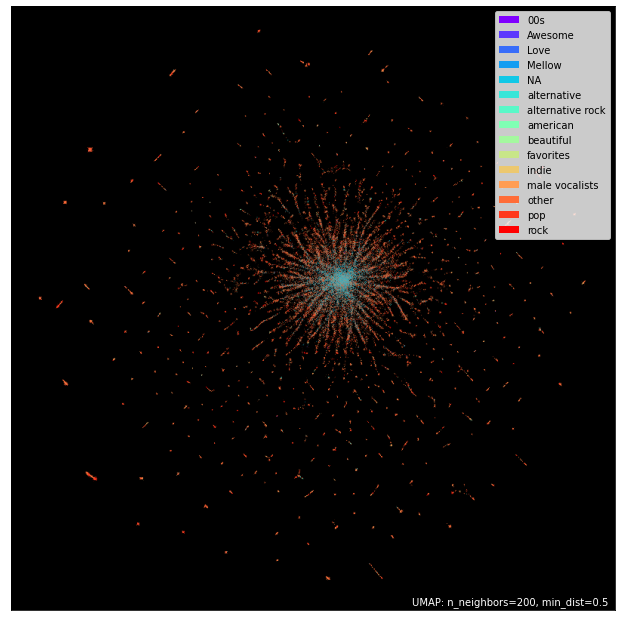

In [27]:
umap.plot.points(mapper, labels = labels, theme = 'fire')
# plt.savefig('400nn_0.75s_0.5md.eps')